In [1]:
import tensorflow as tf
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_test.shape

(10000,)

In [5]:
y_train.shape

(60000,)

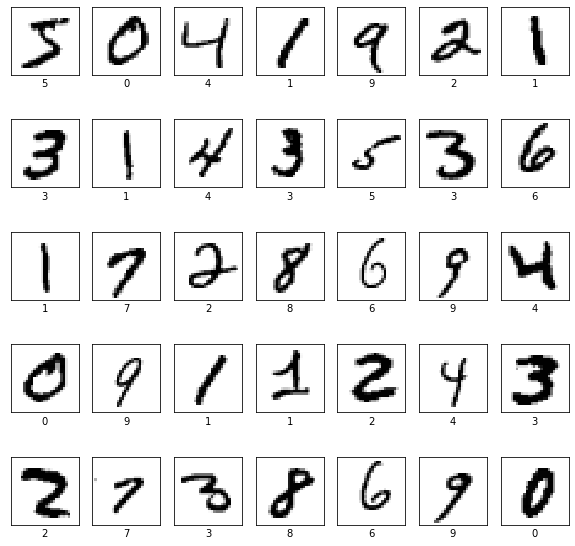

In [6]:
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[i])
plt.show()

In [7]:
x_train= x_train / 255.0
x_test=x_test / 255.0

In [8]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
from tensorflow.keras import models,layers

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(300,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),batch_size=64)

Epoch 1/10
938/938 [==============================] - 144s 153ms/step - loss: 1.6174 - accuracy: 0.8443 - val_loss: 1.5785 - val_accuracy: 0.8815
Epoch 2/10
938/938 [==============================] - 154s 164ms/step - loss: 1.5802 - accuracy: 0.8799 - val_loss: 1.5788 - val_accuracy: 0.8806
Epoch 3/10
938/938 [==============================] - 146s 156ms/step - loss: 1.4989 - accuracy: 0.9622 - val_loss: 1.4866 - val_accuracy: 0.9742
Epoch 4/10
938/938 [==============================] - 133s 142ms/step - loss: 1.4903 - accuracy: 0.9706 - val_loss: 1.5119 - val_accuracy: 0.9496
Epoch 5/10
938/938 [==============================] - 131s 139ms/step - loss: 1.4896 - accuracy: 0.9715 - val_loss: 1.4822 - val_accuracy: 0.9789
Epoch 6/10
938/938 [==============================] - 130s 138ms/step - loss: 1.4951 - accuracy: 0.9660 - val_loss: 1.4982 - val_accuracy: 0.9631
Epoch 7/10
938/938 [==============================] - 129s 138ms/step - loss: 1.4970 - accuracy: 0.9641 - val_loss: 1.5111 -

313/313 - 4s - loss: 1.4970 - accuracy: 0.9642


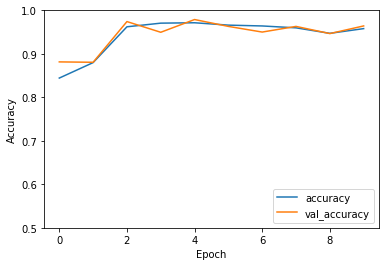

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [22]:
print(f'Test accuracy score with no regularization is: {test_acc}')

Test accuracy score with no regularization is: 0.9642000198364258


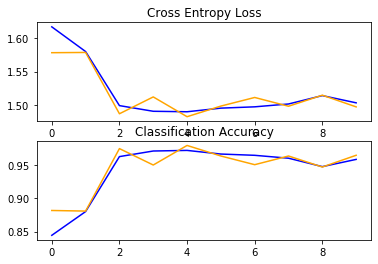

In [20]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

### Trying Using Dropout Regularization Technique

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(300,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),batch_size=64)

Epoch 1/10
938/938 [==============================] - 155s 166ms/step - loss: 1.6295 - accuracy: 0.8317 - val_loss: 1.5836 - val_accuracy: 0.8775
Epoch 2/10
938/938 [==============================] - 162s 173ms/step - loss: 1.5804 - accuracy: 0.8802 - val_loss: 1.5719 - val_accuracy: 0.8887
Epoch 3/10
938/938 [==============================] - 159s 169ms/step - loss: 1.5777 - accuracy: 0.8830 - val_loss: 1.5699 - val_accuracy: 0.8903
Epoch 4/10
938/938 [==============================] - 156s 166ms/step - loss: 1.5778 - accuracy: 0.8830 - val_loss: 1.5684 - val_accuracy: 0.8925
Epoch 5/10
938/938 [==============================] - 155s 165ms/step - loss: 1.5861 - accuracy: 0.8748 - val_loss: 1.5968 - val_accuracy: 0.8643
Epoch 6/10
938/938 [==============================] - 154s 165ms/step - loss: 1.5895 - accuracy: 0.8715 - val_loss: 1.5852 - val_accuracy: 0.8759
Epoch 7/10
938/938 [==============================] - 152s 162ms/step - loss: 1.5926 - accuracy: 0.8685 - val_loss: 1.5957 -

313/313 - 6s - loss: 1.5931 - accuracy: 0.8680


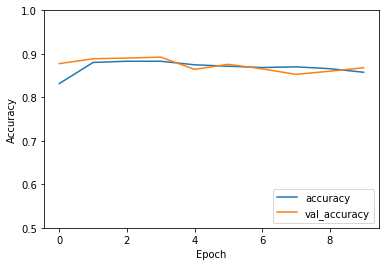

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [28]:
print(f'Test accuracy score using dropout regularization is: {test_acc}')

Test accuracy score using dropout regularization is: 0.8679999709129333


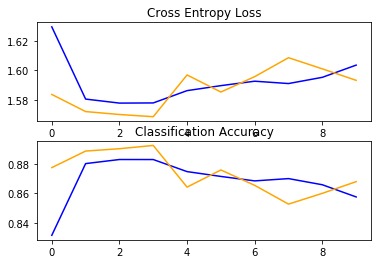

In [29]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


In [34]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
                              epochs = 10, validation_data = (x_test,y_test),
                               steps_per_epoch=x_train.shape[0] // 64)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
937/937 [==============================] - 174s 186ms/step - loss: 1.7311 - accuracy: 0.7299 - val_loss: 1.5799 - val_accuracy: 0.8812
Epoch 2/10
937/937 [==============================] - 170s 181ms/step - loss: 1.7425 - accuracy: 0.7185 - val_loss: 1.6399 - val_accuracy: 0.8212
Epoch 3/10
937/937 [==============================] - 165s 176ms/step - loss: 1.7147 - accuracy: 0.7464 - val_loss: 1.6059 - val_accuracy: 0.8553
Epoch 4/10
937/937 [==============================] - 164s 175ms/step - loss: 1.7498 - accuracy: 0.7113 - val_loss: 1.5846 - val_accuracy: 0.8765
Epoch 5/10
937/937 [==============================] - 164s 175ms/step - loss: 1.6854 - accuracy: 0.7757 - val_loss: 1.5858 - val_accuracy: 0.8754
Epoch 6/10
937/937 [==============================] - 165s 176ms/step - loss: 1.6938 - accuracy: 0.7674 - val_loss: 1.5992 - val_accuracy: 0.8620
Epoch 7/10
937/937 [============================

313/313 - 5s - loss: 1.6158 - accuracy: 0.8453


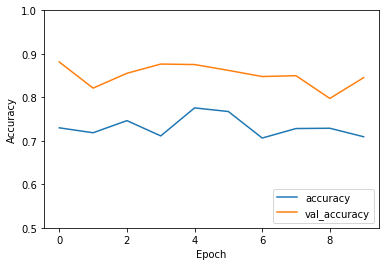

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

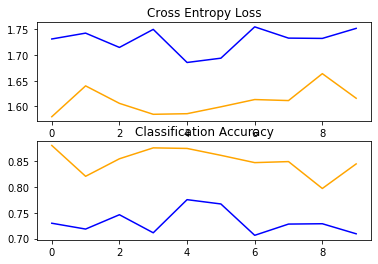

In [36]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

#### It appears using Dropout and Data augumentation didn't  improve the model using 10 epoches

##### I guess increaing the epoch will lead to a futher improvement